In [80]:
import numpy as np 
import matplotlib.pyplot as plt 
from uncertainties import ufloat
import uncertainties.unumpy as unp
from scipy.optimize import curve_fit
import scipy.constants as const

In [81]:
#Daten einlesen
X=[0]
xmr=np.genfromtxt('Messing.txt', usecols=(0))
ymr=np.genfromtxt('Messing.txt', usecols=(1))
xlmr=np.genfromtxt('Messing.txt', usecols=(2))
ylmr=np.genfromtxt('Messing.txt', usecols=(3))
xrmr=np.genfromtxt('Messing.txt', usecols=(4))
yrmr=np.genfromtxt('Messing.txt', usecols=(5))

xer=np.genfromtxt('Eisen.txt', usecols=(0))
yer=np.genfromtxt('Eisen.txt', usecols=(1))
xler=np.genfromtxt('Eisen.txt', usecols=(2))
yler=np.genfromtxt('Eisen.txt', usecols=(3))
xrer=np.genfromtxt('Eisen.txt', usecols=(4))
yrer=np.genfromtxt('Eisen.txt', usecols=(5))

xar=np.genfromtxt('Aluminium.txt', usecols=(0))
yar=np.genfromtxt('Aluminium.txt', usecols=(1))
xlar=np.genfromtxt('Aluminium.txt', usecols=(2))
ylar=np.genfromtxt('Aluminium.txt', usecols=(3))
xrar=np.genfromtxt('Aluminium.txt', usecols=(4))
yrar=np.genfromtxt('Aluminium.txt', usecols=(5))

xkr=np.genfromtxt('Kupfer.txt', usecols=(0))
ykr=np.genfromtxt('Kupfer.txt', usecols=(1))
xlkr=np.genfromtxt('Kupfer.txt', usecols=(2))
ylkr=np.genfromtxt('Kupfer.txt', usecols=(3))
xrkr=np.genfromtxt('Kupfer.txt', usecols=(4))
yrkr=np.genfromtxt('Kupfer.txt', usecols=(5))

#Stablängen
Lm=ufloat(0.575,0.001)
Le=ufloat(0.58,0.001)
La=ufloat(0.6,0.001)
Lk=ufloat(0.601,0.001)

#Stabmassen
mm=ufloat(0.3781,0.0001)
me=ufloat(0.356,0.0001)
ma=ufloat(0.16699,0.0001)
mk=ufloat(0.5356,0.0001)

#Durchmesser
dm=ufloat(0.01,0.00005)
de=ufloat(0.01,0.00005)

#Seiten 
aa=ufloat(0.01,0.00005)
ak=ufloat(0.01,0.00005)

#angehängte Massen
masse1=ufloat(0.453,0.0001) # Bei einseitiger Einspannung
masse2=ufloat(2.859,0.0001) # Bei beidseitig Messing
masse3=ufloat(4.298,0.0001) # Bei beidseitig Eisen, Alu, Kupfer

In [82]:
#Daten in Form bringen
#y Daten im meter umrechnen
a=0
ym=X*len(ymr)
ye=X*len(ymr)
ya=X*len(ymr)
yk=X*len(ymr)

ymn=X*len(ymr)
yen=X*len(ymr)
yan=X*len(ymr)
ykn=X*len(ymr)

xm=X*len(ymr)
xe=X*len(ymr)
xa=X*len(ymr)
xk=X*len(ymr)
while a < len(ymr):
    ym[a]=ufloat(ymr[a]/1000,0.001)
    ye[a]=ufloat(yer[a]/1000,0.001)
    ya[a]=ufloat(yar[a]/1000,0.001)
    yk[a]=ufloat(ykr[a]/1000,0.001)
    
    ymn[a]=ym[a].n
    yen[a]=ye[a].n
    yan[a]=ya[a].n
    ykn[a]=yk[a].n

    xm[a]=ufloat(xmr[a],0.001)
    xe[a]=ufloat(xer[a],0.001)
    xa[a]=ufloat(xar[a],0.001)
    xk[a]=ufloat(xkr[a],0.001)
    a=a+1

# y daten in meter umrechnen und nullen rauskürzen
b=0
ylm=X*5
yle=X*5
yla=X*5
ylk=X*5
yrm=X*5
yre=X*5
yra=X*5
yrk=X*5

xlm=X*5
xle=X*5
xla=X*5
xlk=X*5
xrm=X*5
xre=X*5
xra=X*5
xrk=X*5

while b < 5:
    ylm[b]=ufloat(ylmr[b]/1000,0.00001)
    yle[b]=ufloat(yler[b]/1000,0.00001)
    yla[b]=ufloat(ylar[b]/1000,0.00001)
    ylk[b]=ufloat(ylkr[b]/1000,0.00001)
    yrm[b]=ufloat(yrmr[b]/1000,0.00001)
    yre[b]=ufloat(yrer[b]/1000,0.00001)
    yra[b]=ufloat(yrar[b]/1000,0.00001)
    yrk[b]=ufloat(yrkr[b]/1000,0.00001)

    xlm[b]=ufloat(xlmr[b],0.001)
    xle[b]=ufloat(xler[b],0.001)
    xla[b]=ufloat(xlar[b],0.001)
    xlk[b]=ufloat(xlkr[b],0.001)
    xrm[b]=ufloat(xrmr[b],0.001)
    xre[b]=ufloat(xrer[b],0.001)
    xra[b]=ufloat(xrar[b],0.001)
    xrk[b]=ufloat(xrkr[b],0.001)
    b=b+1
s=0
ylmsort=X*len(ylm)
xlmsort=X*len(ylm)
ylesort=X*len(ylm)
xlesort=X*len(ylm)
ylasort=X*len(ylm)
xlasort=X*len(ylm)
ylksort=X*len(ylm)
xlksort=X*len(ylm)
while s < 5:
    ylmsort[s]=ylm[4-s]
    xlmsort[s]=xlm[4-s]
    ylesort[s]=yle[4-s]
    xlesort[s]=xle[4-s]
    ylasort[s]=yla[4-s]
    xlasort[s]=xla[4-s]
    ylksort[s]=ylk[4-s]
    xlksort[s]=xlk[4-s]

    s=s+1
#Zusammenfassn von rechter und linker Messuhr
#ydm=ylmsort+yrm
#xdm=xlmsort+xrm
#yde=ylesort+yre
#xde=xlesort+xre
#yda=ylasort+yra
#xda=xlasort+xra
#ydk=ylksort+yrk
#xdk=xlksort+xrk
#print(xdk,ydk)


In [83]:
# Voulumen und dichten berechen
Vm=Lm*const.pi*(dm/2)**2
Ve=Le*const.pi*(de/2)**2
Va=La*aa*aa
Vk=Lk*aa*aa

rhom=mm/Vm
rhoe=me/Ve
rhoa=ma/Va
rhok=mk/Vk

print('Messing, Voulumen=', Vm,'m3 Dichte=',rhom,'kg/m3')
print('Eisen, Voulumen=', Ve,'m3 Dichte=',rhoe,'kg/m3')
print('Aluminum, Voulumen=', Va,'m3 Dichte=',rhoa,'kg/m3')
print('Kupfer, Voulumen=', Vk,'m3 Dichte=',rhok,'kg/m3')


Messing, Voulumen= (4.52+/-0.05)e-05 m3 Dichte= (8.37+/-0.09)e+03 kg/m3
Eisen, Voulumen= (4.56+/-0.05)e-05 m3 Dichte= (7.82+/-0.08)e+03 kg/m3
Aluminum, Voulumen= (6.00+/-0.06)e-05 m3 Dichte= 2783+/-28 kg/m3
Kupfer, Voulumen= (6.01+/-0.06)e-05 m3 Dichte= (8.91+/-0.09)e+03 kg/m3


In [84]:
L=0.54
#Berechnung der X Achse
c=0
xmq1=X*len(xm)
xmq1n=X*len(xm)
xmq1s=X*len(xm)

xeq1=X*len(xm)
xeq1n=X*len(xm)
xeq1s=X*len(xm)

xaq1=X*len(xm)
xaq1n=X*len(xm)
xaq1s=X*len(xm)

xkq1=X*len(xm)
xkq1n=X*len(xm)
xkq1s=X*len(xm)



while c < len(xm):
    xmq1[c]=(L*xm[c]**2)-(xm[c]**3/3)
    xmq1n[c]=xmq1[c].n
    xmq1s[c]=xmq1[c].s
  
    xeq1[c]=(L*xe[c]**2)-(xe[c]**3/3)
    xeq1n[c]=xeq1[c].n
    xeq1s[c]=xeq1[c].s
    
    xaq1[c]=(L*xa[c]**2)-(xa[c]**3/3)
    xaq1n[c]=xaq1[c].n
    xaq1s[c]=xaq1[c].s
    
    xkq1[c]=(L*xk[c]**2)-(xk[c]**3/3)
    xkq1n[c]=xkq1[c].n
    xkq1s[c]=xkq1[c].s
    c=c+1


a = 0.0444 ± 0.0015
b = 0.0000 ± 0.0001
c = 0.0209 ± 0.0005
d = 0.0001 ± 0.0000
e = 0.0371 ± 0.0013
f = 0.0000 ± 0.0001
g = 0.0240 ± 0.0004
h = 0.0000 ± 0.0000


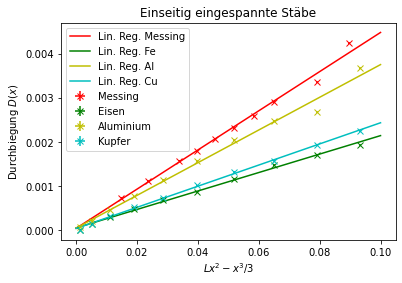

In [85]:
#Berechnung der Linearen Regression für einseitig eingespannte Stäbe
x_plot = np.linspace(0, 0.1)
params1, covariance_matrix1 = np.polyfit(xmq1n, ymn, deg=1, cov=True)
errors1 = np.sqrt(np.diag(covariance_matrix1))
for name, value, error in zip('ab', params1, errors1):
    print(f'{name} = {value:.4f} ± {error:.4f}')

params2, covariance_matrix2 = np.polyfit(xeq1n, yen, deg=1, cov=True)
errors2 = np.sqrt(np.diag(covariance_matrix2))
for name, value, error in zip('cd', params2, errors2):
    print(f'{name} = {value:.4f} ± {error:.4f}')

params3, covariance_matrix3 = np.polyfit(xaq1n, yan, deg=1, cov=True)
errors3 = np.sqrt(np.diag(covariance_matrix3))
for name, value, error in zip('ef', params3, errors3):
    print(f'{name} = {value:.4f} ± {error:.4f}')

params4, covariance_matrix4 = np.polyfit(xkq1n, ykn, deg=1, cov=True)
errors4 = np.sqrt(np.diag(covariance_matrix4))
for name, value, error in zip('gh', params4, errors4):
    print(f'{name} = {value:.4f} ± {error:.4f}')
#Plot
plt.errorbar(xmq1n , ymn , xerr=xmq1s, yerr=0.00001, fmt='rx',label='Messing')
plt.errorbar(xeq1n , yen , xerr=xeq1s, yerr=0.00001, fmt='gx',label='Eisen')
plt.errorbar(xaq1n , yan , xerr=xaq1s, yerr=0.00001, fmt='yx',label='Aluminium')
plt.errorbar(xkq1n , ykn , xerr=xkq1s, yerr=0.00001, fmt='cx',label='Kupfer')

plt.plot(x_plot,params1[0] * x_plot + params1[1],'r-', label='Lin. Reg. Messing')
plt.plot(x_plot,params2[0] * x_plot + params2[1],'g-', label='Lin. Reg. Fe')
plt.plot(x_plot,params3[0] * x_plot + params3[1],'y-', label='Lin. Reg. Al')
plt.plot(x_plot,params4[0] * x_plot + params4[1],'c-', label='Lin. Reg. Cu')

plt.title('Einseitig eingespannte Stäbe')
plt.xlabel('$Lx^2-x^3/3$')
plt.ylabel('Durchbiegung $D(x)$')
plt.legend(loc='best')
plt.savefig('einseitig.pdf')

In [86]:
L1=0.55
d=0
xdqm1=X*5
ydmn1=X*5
xdmn1=X*5
xdms1=X*5
ydms1=X*5

xdqe1=X*5
yden1=X*5
xden1=X*5
xdes1=X*5
ydes1=X*5

xdqa1=X*5
ydan1=X*5
xdan1=X*5
xdas1=X*5
ydas1=X*5

xdqk1=X*5
ydkn1=X*5
xdkn1=X*5
xdks1=X*5
ydks1=X*5




xdqm2=X*5
ydmn2=X*5
xdmn2=X*5
xdms2=X*5
ydms2=X*5

xdqe2=X*5
yden2=X*5
xden2=X*5
xdes2=X*5
ydes2=X*5

xdqa2=X*5
ydan2=X*5
xdan2=X*5
xdas2=X*5
ydas2=X*5

xdqk2=X*5
ydkn2=X*5
xdkn2=X*5
xdks2=X*5
ydks2=X*5
while d < len(ydm)/2:
    xdqm1[d]=(3*L1**2*xlmsort[d])-(4*xlmsort[d]**3)
    ydmn1[d]=ylmsort[d].n
    xdmn1[d]=xdqm1[d].n
    ydms1[d]=ylmsort[d].s
    xdms1[d]=xdqm1[d].s

    xdqe1[d]=(3*L1**2*xlesort[d])-(4*xlesort[d]**3)
    yden1[d]=ylesort[d].n
    xden1[d]=xdqe1[d].n
    ydes1[d]=ylesort[d].s
    xdes1[d]=xdqe1[d].s

    xdqa1[d]=(3*L1**2*xlasort[d])-(4*xlasort[d]**3)
    ydan1[d]=ylasort[d].n
    xdan1[d]=xdqa1[d].n
    ydas1[d]=ylasort[d].s
    xdas1[d]=xdqa1[d].s

    xdqk1[d]=(3*L1**2*xlksort[d])-(4*xlksort[d]**3)
    ydkn1[d]=ylksort[d].n
    xdkn1[d]=xdqk1[d].n
    ydks1[d]=ylksort[d].s
    xdks1[d]=xdqk1[d].s
   

    xdqm2[d]=(4*xrm[d]**3)-(12*xrm[d]**2*L1)+(9*L1**2)-(L1**3)
    ydmn2[d]=yrm[d].n
    xdmn2[d]=xdqm2[d].n
    ydms2[d]=yrm[d].s
    xdms2[d]=xdqm2[d].s

    xdqe2[d]=(4*xre[d]**3)-(12*xre[d]**2*L1)+(9*L1**2)-(L1**3)
    yden2[d]=yre[d].n
    xden2[d]=xdqe2[d].n
    ydes2[d]=yre[d].s
    xdes2[d]=xdqe2[d].s

    xdqa2[d]=(4*xra[d]**3)-(12*xra[d]**2*L1)+(9*L1**2)-(L1**3)
    ydan2[d]=yra[d].n
    xdan2[d]=xdqa2[d].n
    ydas2[d]=yra[d].s
    xdas2[d]=xdqa2[d].s

    xdqk2[d]=(4*xrk[d]**3)-(12*xrk[d]**2*L1)+(9*L1**2)-(L1**3)
    ydkn2[d]=yrk[d].n
    xdkn2[d]=xdqk2[d].n
    ydks2[d]=yrk[d].s
    xdks2[d]=xdqk2[d].s
    d=d+1
    
print(ydm)

[0.00087+/-1e-05, 0.00073+/-1e-05, 0.0005+/-1e-05, 0.00038+/-1e-05, 0.00019+/-1e-05, 0.0+/-1e-05, 0.0+/-1e-05, 8.999999999999999e-05+/-1e-05, 0.00041999999999999996+/-1e-05, 0.00068+/-1e-05]


a = 0.0029 ± 0.0002
b = 0.0004 ± 0.0000
c = 0.0044 ± 0.0003
d = 0.0006 ± 0.0000
e = 0.0038 ± 0.0003
f = 0.0012 ± 0.0000
g = 0.0046 ± 0.0003
h = 0.0005 ± 0.0000


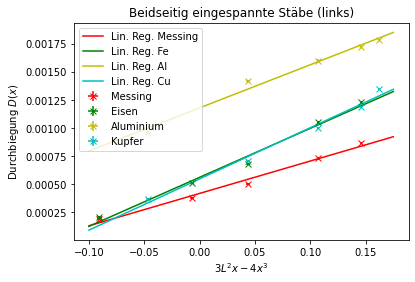

In [87]:
x_plot2 = np.linspace(-0.1, 0.175)
params5, covariance_matrix5 = np.polyfit(xdmn1, ydmn1, deg=1, cov=True)
errors5 = np.sqrt(np.diag(covariance_matrix5))
for name, value, error in zip('ab', params5, errors5):
    print(f'{name} = {value:.4f} ± {error:.4f}')

params6, covariance_matrix6 = np.polyfit(xden1, yden1, deg=1, cov=True)
errors6 = np.sqrt(np.diag(covariance_matrix6))
for name, value, error in zip('cd', params6, errors6):
    print(f'{name} = {value:.4f} ± {error:.4f}')

params7, covariance_matrix7 = np.polyfit(xdan1, ydan1, deg=1, cov=True)
errors7 = np.sqrt(np.diag(covariance_matrix7))
for name, value, error in zip('ef', params7, errors7):
    print(f'{name} = {value:.4f} ± {error:.4f}')

params8, covariance_matrix8 = np.polyfit(xdkn1, ydkn1, deg=1, cov=True)
errors8 = np.sqrt(np.diag(covariance_matrix8))
for name, value, error in zip('gh', params8, errors8):
    print(f'{name} = {value:.4f} ± {error:.4f}')


plt.errorbar(xdmn1 , ydmn1 , xerr=xdms1, yerr=ydms1, fmt='rx',label='Messing')
plt.errorbar(xden1 , yden1 , xerr=xdes1, yerr=ydes1, fmt='gx',label='Eisen')
plt.errorbar(xdan1 , ydan1 , xerr=xdas1, yerr=ydas1, fmt='yx',label='Aluminium')
plt.errorbar(xdkn1 , ydkn1 , xerr=xdks1, yerr=ydks1, fmt='cx',label='Kupfer')

plt.plot(x_plot2,params5[0] * x_plot2 + params5[1],'r-', label='Lin. Reg. Messing')
plt.plot(x_plot2,params6[0] * x_plot2 + params6[1],'g-', label='Lin. Reg. Fe')
plt.plot(x_plot2,params7[0] * x_plot2 + params7[1],'y-', label='Lin. Reg. Al')
plt.plot(x_plot2,params8[0] * x_plot2 + params8[1],'c-', label='Lin. Reg. Cu')

plt.title('Beidseitig eingespannte Stäbe (links)')
plt.xlabel('$3L^2x-4x^3$')
plt.ylabel('Durchbiegung $D(x)$')
plt.legend(loc='best')
plt.savefig('beidseitig1.pdf')


a = -0.002054 ± 0.000273
b = 0.005178 ± 0.000657
c = -0.004012 ± 0.000523
d = 0.010295 ± 0.001261
e = -0.003663 ± 0.000489
f = 0.009559 ± 0.001173
g = -0.003983 ± 0.000504
h = 0.010273 ± 0.001209


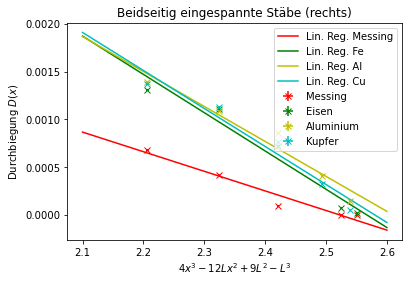

In [88]:
x_plot3 = np.linspace(2.1, 2.6)
params9, covariance_matrix9 = np.polyfit(xdmn2, ydmn2, deg=1, cov=True)
errors9 = np.sqrt(np.diag(covariance_matrix9))
for name, value, error in zip('ab', params9, errors9):
    print(f'{name} = {value:.6f} ± {error:.6f}')

params10, covariance_matrix10 = np.polyfit(xden2, yden2, deg=1, cov=True)
errors10 = np.sqrt(np.diag(covariance_matrix10))
for name, value, error in zip('cd', params10, errors10):
    print(f'{name} = {value:.6f} ± {error:.6f}')

params11, covariance_matrix11 = np.polyfit(xdan2, ydan2, deg=1, cov=True)
errors11 = np.sqrt(np.diag(covariance_matrix11))
for name, value, error in zip('ef', params11, errors11):
    print(f'{name} = {value:.6f} ± {error:.6f}')

params12, covariance_matrix12 = np.polyfit(xdkn2, ydkn2, deg=1, cov=True)
errors12 = np.sqrt(np.diag(covariance_matrix12))
for name, value, error in zip('gh', params12, errors12):
    print(f'{name} = {value:.6f} ± {error:.6f}')

plt.errorbar(xdmn2 , ydmn2 , xerr=xdms2, yerr=ydms2, fmt='rx',label='Messing')
plt.errorbar(xden2 , yden2 , xerr=xdes2, yerr=ydes2, fmt='gx',label='Eisen')
plt.errorbar(xdan2 , ydan2 , xerr=xdas2, yerr=ydas2, fmt='yx',label='Aluminium')
plt.errorbar(xdkn2 , ydkn2 , xerr=xdks2, yerr=ydks2, fmt='cx',label='Kupfer')

plt.plot(x_plot3,params9[0] * x_plot3 + params9[1],'r-', label='Lin. Reg. Messing')
plt.plot(x_plot3,params10[0] * x_plot3 + params10[1],'g-', label='Lin. Reg. Fe')
plt.plot(x_plot3,params11[0] * x_plot3 + params11[1],'y-', label='Lin. Reg. Al')
plt.plot(x_plot3,params12[0] * x_plot3 + params12[1],'c-', label='Lin. Reg. Cu')

plt.title('Beidseitig eingespannte Stäbe (rechts)')
plt.xlabel('$4x^3-12Lx^2+9L^2-L^3$')
plt.ylabel('Durchbiegung $D(x)$')
plt.legend(loc='best')
plt.savefig('beidseitig2.pdf')

In [89]:
am1=ufloat(params1[0],errors1[0])
am2=ufloat(params5[0],errors5[0])
am3=ufloat(params9[0],errors9[0])

ae1=ufloat(params2[0],errors2[0])
ae2=ufloat(params6[0],errors6[0])
ae3=ufloat(params10[0],errors10[0])

aa1=ufloat(params3[0],errors3[0])
aa2=ufloat(params7[0],errors7[0])
aa3=ufloat(params11[0],errors11[0])

ak1=ufloat(params4[0],errors4[0])
ak2=ufloat(params8[0],errors8[0])
ak3=ufloat(params12[0],errors12[0])

#I rund berechen
Im=const.pi/4*(dm/2)**4
Ie=const.pi/4*(de/2)**4
print('Flächenträgheitsmoment Messing =',Im)
print('Flächenträgheitsmoment Eisen =',Ie)

#I eckig berechen
Ia=aa**4/12
Ik=ak**4/12
print('Flächenträgheitsmoment Aluminium =',Ia)
print('Flächenträgheitsmoment Kupfer =',Ik)
print('########################################################')
#E einseitig berechen
Em1=(masse1*const.g)/(2*Im*am1)
Ee1=(masse1*const.g)/(2*Ie*ae1)
Ea1=(masse1*const.g)/(2*Ia*aa1)
Ek1=(masse1*const.g)/(2*Ik*ak1)
print('Elastizitätsmodul einseitig Messing=',Em1)
print('Elastizitätsmodul einseitig Eisen=',Ee1)
print('Elastizitätsmodul einseitig Aluminium=',Ea1)
print('Elastizitätsmodul einseitig Kupfer=',Ek1)
print('########################################################')
#E beidseitig berechnen
Em2=(masse2*const.g)/(48*Im*am2)
Ee2=(masse3*const.g)/(48*Ie*ae2)
Ea2=(masse3*const.g)/(48*Ia*aa2)
Ek2=(masse3*const.g)/(48*Ik*ak2)

Em3=(masse2*const.g)/(48*Im*am3)
Ee3=(masse3*const.g)/(48*Ie*ae3)
Ea3=(masse3*const.g)/(48*Ia*aa3)
Ek3=(masse3*const.g)/(48*Ik*ak3)

print('Elastizitätsmodul beidseitig 1 Messing=',Em2)
print('Elastizitätsmodul beidseitig 1 Eisen=',Ee2)
print('Elastizitätsmodul beidseitig 1 Aluminium=',Ea2)
print('Elastizitätsmodul beidseitig 1 Kupfer=',Ek2)
print('########################################################')
print('Elastizitätsmodul beidseitig 2 Messing=',Em3)
print('Elastizitätsmodul beidseitig 2 Eisen=',Ee3)
print('Elastizitätsmodul beidseitig 2 Aluminium=',Ea3)
print('Elastizitätsmodul beidseitig 2 Kupfer=',Ek3)

Flächenträgheitsmoment Messing = (4.91+/-0.10)e-10
Flächenträgheitsmoment Eisen = (4.91+/-0.10)e-10
Flächenträgheitsmoment Aluminium = (8.33+/-0.17)e-10
Flächenträgheitsmoment Kupfer = (8.33+/-0.17)e-10
########################################################
Elastizitätsmodul einseitig Messing= (1.02+/-0.04)e+11
Elastizitätsmodul einseitig Eisen= (2.16+/-0.07)e+11
Elastizitätsmodul einseitig Aluminium= (7.19+/-0.29)e+10
Elastizitätsmodul einseitig Kupfer= (1.112+/-0.028)e+11
########################################################
Elastizitätsmodul beidseitig 1 Messing= (4.13+/-0.30)e+11
Elastizitätsmodul beidseitig 1 Eisen= (4.11+/-0.29)e+11
Elastizitätsmodul beidseitig 1 Aluminium= (2.75+/-0.22)e+11
Elastizitätsmodul beidseitig 1 Kupfer= (2.31+/-0.16)e+11
########################################################
Elastizitätsmodul beidseitig 2 Messing= (-5.8+/-0.8)e+11
Elastizitätsmodul beidseitig 2 Eisen= (-4.5+/-0.6)e+11
Elastizitätsmodul beidseitig 2 Aluminium= (-2.9+/-0.4)e+11
Ela